In [1]:
from astropy.visualization import ImageNormalize, LogStretch
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from censai.physical_model import PhysicalModel
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [36]:
# datapath = "../results/kappa512_100kpc_2/kappa_017908_xy_100.fits"
datapath = "../results/kappa512_100kpc_2/kappa_027879_xy_100.fits"
data = fits.open(datapath)
data[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
SUBID   =                27879                                                  
MASS    =     4293.12651185445 / Total mass in the subhalo, in 10^{10} solar mas
CUTMASS =    499.5495880398672 / Total mass in the cutout in 10^{10} solar mass 
CREATED = '21-05-19_19-50-34'                                                   
OFFSET0 =             84761538                                                  
OFFSET1 =            112959235                                                  
OFFSET4 =              9752171                                                  
OFFSET5 =                 11

In [37]:
kap_side = data[0].header["NAXIS1"] * data[0].header["CD1_1"]
print(kap_side)
phys = PhysicalModel(image_side=kap_side, src_side=3.0, pixels=256, kappa_side=kap_side, method="conv2d", noise_rms=1, logkappa=False, checkpoint_path=None)

10.75505357480022


In [38]:
kappa = tf.constant(data[0].data[np.newaxis, ..., np.newaxis], tf.float32)
#resize for test
kappa = tf.image.resize(kappa, [256, 256])

In [39]:
x = np.linspace(-phys.src_side/2, phys.src_side/2, 256)
xx, yy = np.meshgrid(x, x)
w = 0.1
im = np.zeros_like(xx)
r = np.hypot(xx, yy)
im += np.exp(-0.5 * r**2/w**2)
im = tf.constant(im[np.newaxis, ..., np.newaxis], tf.float32)
lim = phys.forward(im, kappa)

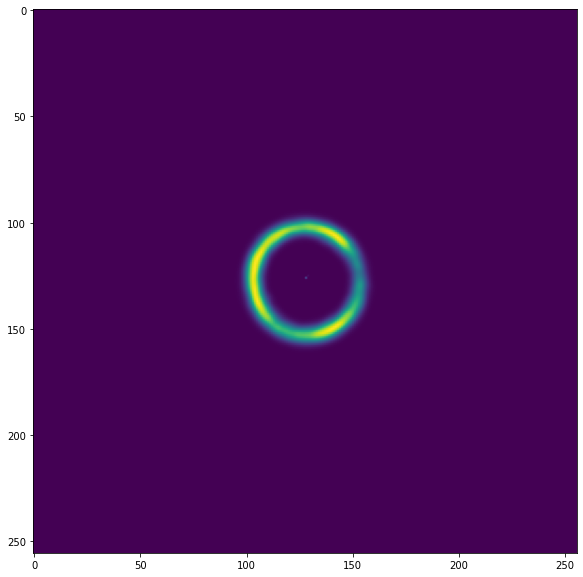

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(lim[0, ..., 0])

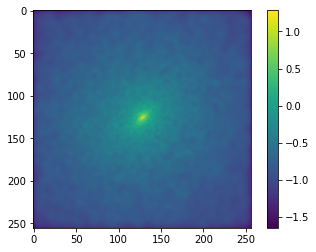

In [41]:
plt.imshow(np.log10(kappa[0, ..., 0]))
plt.colorbar()